In [80]:
import collections
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy.sparse
import random, pickle
import re,itertools
import matplotlib
import matplotlib.pyplot as plt
from music21 import *

In [2]:
%matplotlib inline

In [3]:
notelist = {}
notes  = pd.read_csv('trigramNotes.txt',header=None)

In [4]:
notesCopy = notes

In [5]:
def roundOff(length):
    if(length>0.75 and length < 1.0):
        return 0.75
    elif(length>0.5 and length<0.75):
        return 0.5
    elif(length<0.5):
        return 0.25
    else : return length

In [6]:
for idx,row in notesCopy.iterrows():
    length = row[1]
    if(length == 0.0): continue
    if(length>1.0): 
        flt = length - int(length)
        flt = roundOff(flt)
        length = int(length)+ float(flt)
    else : length = roundOff(length)
    notesCopy[1][idx] = length
        


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
with open("modifiedTrigramNotes.txt", 'w') as f:
    for n,l in zip(notesCopy[0], notesCopy[1]):
        f.write("%s,%s\n" % (n,l))

In [8]:
notes = notesCopy

In [9]:
notes['Offset'] = 0.0
totalOff=0.0
for index, row in notes.iterrows():
    if(index == 0): 
        totalOff = 0.0
    else: totalOff+=row[1]
    notes['Offset'][index] = totalOff


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
X = notes['Offset'].reshape((-1,1))
y = notes[1].reshape((-1,1))
n = notes[0].reshape((-1,1))
Xy = np.concatenate((X,y),axis=1)

In [11]:
# scatter plot 
from sklearn.cluster import KMeans
from scipy import cluster


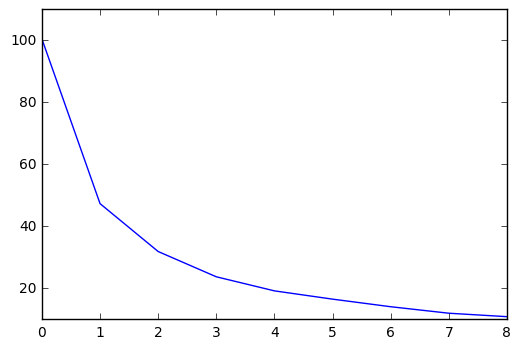

In [12]:
initial = [cluster.vq.kmeans(Xy[1:500],i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

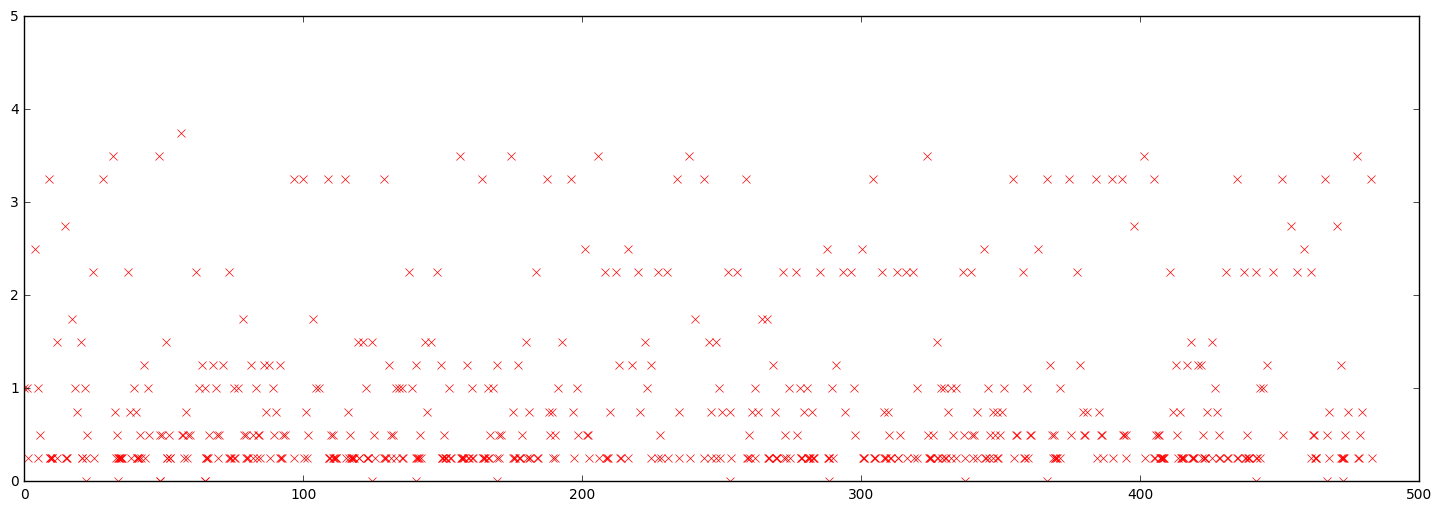

In [88]:
plt.plot(X,y,'.',color='r',marker='x', linewidth=1.5)
plt.ylim((0.0,5));
plt.xlim((0,500));
fig = plt.gcf()
fig.set_size_inches(18, 6)




In [14]:
km = KMeans(n_clusters=8)
km.fit(Xy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
def plotTiming(data, labels=None, clustercenters=None):
    numberofitems = len(data)
    
    # generate colors
    clusterCodes = dict()
    if labels is not None:
        for i in labels:
            r = lambda: random.randint(0,255)
            clusterCodes[i] = ('#%02X%02X%02X' % (r(),r(),r())).lower()
    
    # Initialize the graph
    dx = data['Offset']
    dy = data[1]
    dn = data[0]
    plt.plot(dx, dy, '.', linewidth=1.5)
    for ix, (x, y) in enumerate(zip(dx, dy)):
        color = 'ko'
        if labels is not None:
            color = clusterCodes[labels[ix]]
            plt.plot(x, y, 'x', ms=15, mew=1.5, color=color)
            continue
        plt.plot(x, y, color)

    # plot the cluster centers if available
    if clustercenters is not None:
        for currColorIx, i in enumerate(clustercenters):
            cx = i[0]
            cy = i[1]
            color = clusterCodes[currColorIx]
            plt.plot(cx, cy, 'ko', mew=0, ms=7.5) # plot black. same color: color=color
                
    # plot the ticks if under certain # of points
    if numberofitems <= 100:
        plt.xticks(range(0, int(max(dx)) + 1))

    # Annotate with note data only if under certain # of points
    # (Otherwise, it gets too messy!)
    if numberofitems <= 100 and labels is None:
        for note, offset, length in izip(dn, dx, dy):
            plt.annotate(note, xy=(offset, length), color='g')

    # Set xticks on top
    fig = plt.gcf()
    ax = plt.gca()
    if numberofitems <= 100:
        ax.xaxis.set_tick_params(labeltop='on')

    # Enter title
    if numberofitems <= 100:
        plt.text(max(dx) / 2, max(dy) + 1.5, 'Original Notes', fontsize=20, horizontalalignment='center')
    else:
        plt.title('Oscar\'s Playing', fontsize=20, horizontalalignment='center')
        
    # set fig limits, size, and other display things
    plt.ylim([0, max(dy)+ 0.25])
    plt.xlim([min(dx) - 1, max(dx) + 1])
    plt.ylabel('Duration', fontsize=16)
    plt.xlabel('Offset', fontsize=16)
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(18, 6)
    # plt.xkcd()
    ax.xaxis.grid(False)

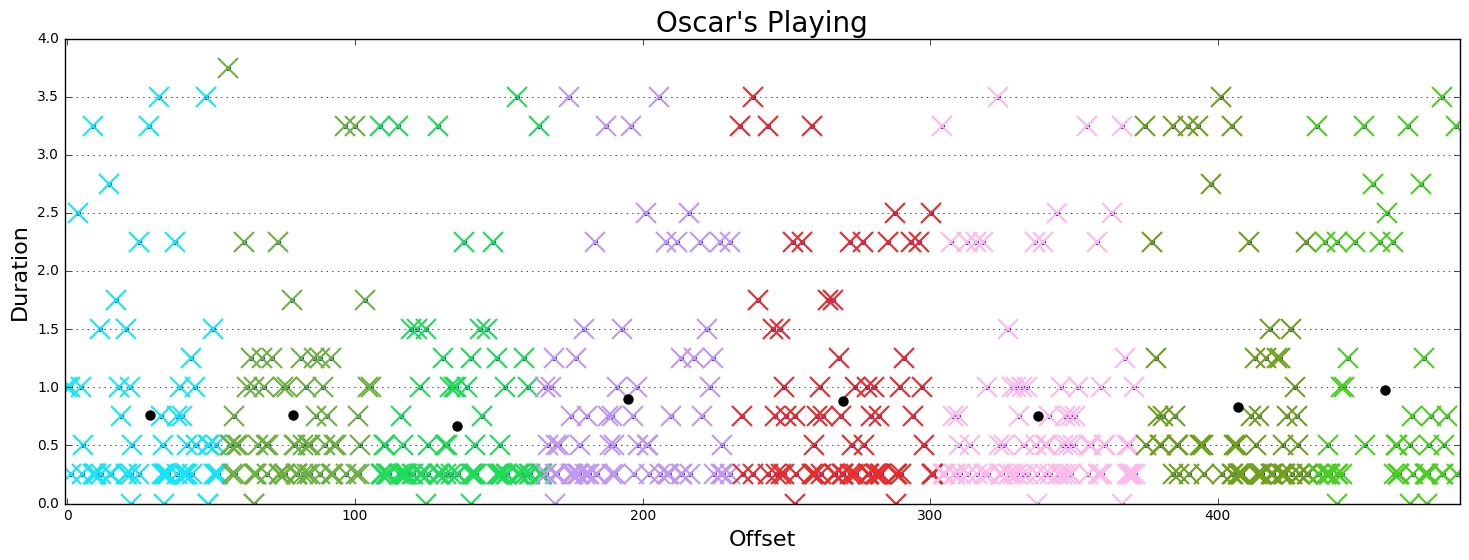

In [16]:
plotTiming(notes, labels=km.labels_, clustercenters=km.cluster_centers_)

In [17]:
cluster_cent = km.cluster_centers_
kmlabels=km.labels_

In [18]:
chords = []
with open('uniqueChords.txt','r') as f:
    for i,j in enumerate(f):
        k = j.split()
        chords.append(k)

In [19]:
#cluster number and notes in cluster
noteMaps = collections.defaultdict(list)
for idx,cent in enumerate(kmlabels):    
    noteMaps[cent].extend(n[idx])  




In [33]:
with open('classifier.pickle','rb') as f1:
    classifier = pickle.load(f1)
with open('chords.pickle','rb') as f2:
    uniqueChords=cPickle.load(f2)

        

In [60]:
uniqueChords[2]

['A3', 'B-3', 'D4']

In [35]:
classifier

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
noteValues = {'C':0,'D':2,'E':4,'F':5,'G':7,'A':9,'B':11}
accidentals = {'-':1,'#':1}

def convertToNumber(notes):
    an = []
    for i,v in enumerate(notes):
        k = v[0]
        c = noteValues.get(k)
        if (v.find('-')):
            c=c-1
        elif (v.find('#')):
            c=c+1 
        d = int(re.search('\d',v).group())
        c = 12*d+c
        an.append(c)
    return an

def subKMeans(cluster,notes):
    numbered = convertToNumber(notes)
    # print('Numbered = ')
    #print((numbered))
    an = np.array(numbered).reshape((-1,1))
    km = KMeans(n_clusters=int(np.sqrt(len(an) / 2)))
    km.fit(an)
    centers = km.cluster_centers_
    print()
    #print('Generated centers : ')
    #print((centers))
    labels = km.labels_
    #print()
    #print('Generated labels : ')
    #print((labels))
    noteMaps1 = collections.defaultdict(list)
    for idx,cent in enumerate(labels):    
        noteMaps1[cent].extend(an[idx])  
    chordsToPlay = []
    for cluster,numberedlist in noteMaps1.items():
        allBits = np.zeros((1,88))
        for i,number in enumerate(numberedlist):
            allBits[0][number] = 1
        match = classifier.predict(allBits)
        #print()
        #print('Match ID = ')
        #print(match)
        chordsToPlay.append(uniqueChords[match[0]])
    return chordsToPlay

In [86]:
measure =[]
for cluster,note in noteMaps.items():
    chordsToPlay = subKMeans(cluster,note)
    print(note)
    print()
    print(chordsToPlay)
    measure.append(chordsToPlay)


['B-3', 'A3', 'C6', 'D6', 'C6', 'E5', 'C5', 'C5', 'A4', 'G4', 'F5', 'C5', 'D5', 'F#3', 'F5', 'A4', 'A4', 'A4', 'A6', 'A5', 'B-3', 'G4', 'B-4', 'B4', 'D5', 'C3', 'D5', 'B-4', 'E5', 'C5', 'G#4', 'F4', 'G4', 'G#4', 'B-4', 'B4', 'D5', 'C3', 'D5', 'B4', 'C5', 'A4', 'A5', 'A4', 'D6', 'F5', 'C#5', 'D5', 'F5', 'B-5', 'B-5', 'G#5', 'F5', 'G#5', 'C5', 'E5', 'G5', 'D5', 'D4', 'D4', 'D5', 'F5', 'A5', 'G5', 'E5', 'D5', 'G3', 'G6', 'D6', 'E-4', 'E-4', 'B-4', 'B4', 'C#5', 'E-5', 'F5', 'F#5', 'G#5', 'C6', 'G#5']

[['B-3', 'C3', 'E4'], ['A3', 'B-3', 'D4'], ['B4', 'F4', 'G4'], ['A3', 'B-3', 'D4'], ['B3', 'E4', 'F3'], ['A3', 'B-3', 'D4']]

['D4', 'E-4', 'F4', 'G4', 'G3', 'F#2', 'B-3', 'E-6', 'B3', 'D3', 'C5', 'B-5', 'D5', 'B-4', 'G#4', 'A4', 'C5', 'A4', 'G4', 'F4', 'D4', 'A3', 'F3', 'G3', 'G#3', 'A3', 'C4', 'F4', 'A3', 'F4', 'B2', 'A3', 'C5', 'B-4', 'G4', 'F4', 'D4', 'C4', 'B3', 'E4', 'C4', 'C6', 'A5', 'F5', 'D5', 'G#4', 'F4', 'D5', 'F3', 'F5', 'G5', 'F5', 'C3', 'B4', 'B-3', 'E-6', 'D6', 'G5', 'G#5', 'A

In [97]:
# music21
# 1. create stream
# 2. add notes and offsets
# will take original offset and  duration and add these new notes along with chord accompaniment

s = stream.Stream()





'/Users/Dixit/Documents/github/jazzml/music21.xml'

In [133]:
import music21 as ms21
b = noteMaps.get(2)
s1 = stream.Stream(id='main score')
p1 = stream.Part(id='part1')
p2 = stream.Part(id='part2')

m1 = stream.Measure(number=1)
m2 = stream.Measure(number=1)
ts1 = meter.TimeSignature('4/4')
ts2 = meter.TimeSignature('4/4')

s1.insert(0, ts1)
s1.insert(0, ts2)

for i,v in enumerate(b):
    noteKey = ms21.note.Note(v)
    #noteKey.duration.quarterLength = [i]
    m1.append(noteKey)
p1.append(m1)
m2.append(ms21.chord.Chord(measure[1][1]))
m2.append(ms21.chord.Chord(measure[2][2]))
m2.append(ms21.chord.Chord(measure[3][3]))
#m2.append(ms21.chord.Chord(measure[3][3]))
p2.append(m2)
s1.insert(0,tempo.MetronomeMark(number=1200.0))
s1.insert(0,p1)
s1.insert(0,p2)


s1.show('midi')

b

In [130]:
print(s1._duration)

None
